In [68]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd

def mse(y_actual, y_pred):
    assert y_actual.shape == y_pred.shape, "Actual and prediction shapes mismatch"
    cost = 0
    
    return (y_pred - y_actual)

def lotka_volterra(t, ys, alpha, beta, delta, gamma):
    x, y = ys
    dx_dt = alpha*x - beta*x*y
    dy_dt = delta*x*y - gamma*y
    
    return dx_dt, dy_dt

In [48]:
df.head()

,t,x,y
0,0.000000,3.035257,4.781635
1,0.202020,2.189746,6.114005
2,0.404040,1.478907,6.238361
3,0.606061,0.989836,5.520524
4,0.808081,0.957827,4.582546


In [30]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 180
mpl.rcParams["legend.fontsize"] = 11
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"""
\usepackage{palatino}
\usepackage{newpxmath}""")
plt.rc("font", family="serif")

In [31]:
df = pd.read_csv("data/predator-prey-data.csv")
x = np.array(df["t"])
y = np.array(df[["x", "y"]])

In [78]:
y[0]

array([3.03525736, 4.78163509])

In [74]:
from scipy.integrate import solve_ivp

init = y[0]
params = [1, 0.2, 1, 1]
sol = solve_ivp(lotka_volterra, (x[0], x[-1]), init, args=params, dense_output=True)
z = sol.sol(x)

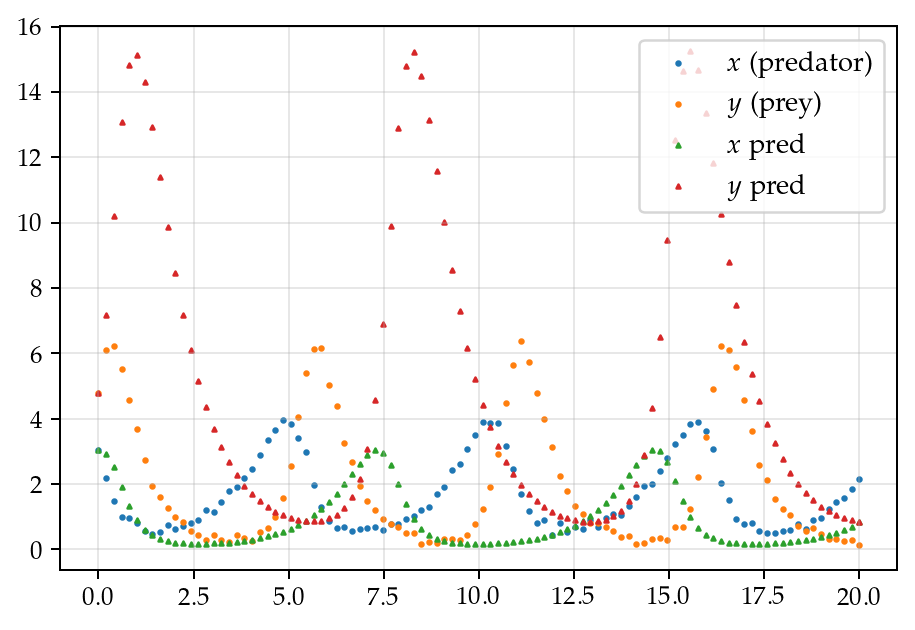

In [80]:
import matplotlib.pyplot as plt

plt.scatter(x, y[:,0], s=2.5, label="$x$ (predator)")
plt.scatter(x, y[:,1], s=2.5, label="$y$ (prey)")
plt.scatter(x, z[0], s=2.5, marker="^", label="$x$ pred")
plt.scatter(x, z[1], s=2.5, marker="^", label="$y$ pred")
plt.legend()
plt.grid(alpha=0.3)
plt.show()